# Reti neurali artificiali
In questo notebook implementeremo la nostra prima rete neurale artificiale utilizzando Keras, lo scopo del nostro modello sarà sempre quello di identificare tumori al seno maligni, a questo scopo utilizzeremo il Winsconsis breast cancer dataset.
<br><br>
Importiamo i vari moduli.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Carichiamo il Winsconsis breast cancer dataset all'interno di un DataFrame.

In [2]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

Creiamo gli array numpy per addestrare e testare la nostra rete neurale.

In [3]:
X = breast_cancer.drop(['diagnosis','id'],axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Codifichiamo i label della nostra variabile target in numeri.

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizziamo gli array con le features.

In [5]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [6]:
X_train.shape

(398, 30)

Adesso possiamo passare alla costruzione della nostra rete neurale artificiale, il primo modello che andremo a creare sarà così composto:
* **30 nodi** nello strato di input
* **12 nodi** nello strato nascosto
* **1 nodo** nello strato di output

La funzione di attivazione che utilizzeremo per lo strato nascosto è la **ReLU**, mentre, trattandosi di un problema di classificazione binaria, per lo strato di output utilizzeremo la sigmoide. [Qui](https://keras.io/activations/) puoi vedere l'elenco completo delle **funzioni di attivazione di base** disponibili con Keras.

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare il numero di parametri totali che la nostra rete dovrà ottimizzare.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


Abbiamo 385 parametri in totale:
* 1 - Un peso per ogni connessione dai 30 nodi di input ai 12 nodi dello strato nascosto (30x12=260), più un bias per ogni nodo nello strato nascosto (12).
* 2 - Un peso per ogni connessione dello strato nascosto all'unico nodo dello strato di output (12), più un bias (1)

Facciamo partire l'addestramento.

In [9]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
398/398 [==============================] - 0s 413us/step - loss: 1.0389 - acc: 0.2161
Epoch 2/100
398/398 [==============================] - 0s 37us/step - loss: 0.8262 - acc: 0.3920
Epoch 3/100
398/398 [==============================] - 0s 40us/step - loss: 0.7000 - acc: 0.4874
Epoch 4/100
398/398 [==============================] - 0s 50us/step - loss: 0.6209 - acc: 0.5829
Epoch 5/100
398/398 [==============================] - 0s 39us/step - loss: 0.5635 - acc: 0.6960
Epoch 6/100
398/398 [==============================] - 0s 42us/step - loss: 0.5191 - acc: 0.7864
Epoch 7/100
398/398 [==============================] - 0s 33us/step - loss: 0.4831 - acc: 0.8618
Epoch 8/100
398/398 [==============================] - 0s 42us/step - loss: 0.4526 - acc: 0.8920
Epoch 9/100
398/398 [==============================] - 0s 31us/step - loss: 0.4260 - acc: 0.9070
Epoch 10/100
398/398 [==============================] - 0s 43us/step - loss: 0.4022 - acc: 0.9146
Epoch 11/100
398/398 [======

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98% e un valore per la funzione di costo di 0.082, verifichiamo il risultato anche sul set di test.

In [10]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

171/171 [==============================] - 0s 191us/step
Loss sul test set: 0.1070
Accuracy sul test set: 0.9591


Confrontando il risultato con quanto fatto in [questo precedente notebook](https://github.com/ProfAI/dl00/blob/master/3%20-%20Machine%20Learning%20in%20breve/Regressione%20logistica%20con%20Keras.ipynb), possiamo osservare come una rete neurale artificiale abbia portanto un risultato migliore rispetto a una semplice regressione logistica, specialmente per quanto riguarda l'incertezza dell'errore.

## Reti neurali artificiali profonde
Adesso proviamo a costruire una rete neurale artificiale profonda, cioè una rete neurale che ha più di uno strato nascosto, nello specifica la nostra rete neurale profonda sarà così composta:
* **30 nodi** nello strato di input
* **12 nodi** nel primo strato nascosto
* **8 nodi** nel secondo strato nascosto
* **4 nodi** nel secondo strato nascosto
* **1 nodo** nello strato di input

Come funzione di attivazione utilizzeremo sempre la ReLU per gli strati nascosti e la sigmoide per lo strato di output.

In [11]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare quanti parametri dovrà ottimizzare il nostro modello questa volta.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


Adesso son ben 517, facciamo partire l'addestramento.

In [13]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
398/398 [==============================] - 0s 548us/step - loss: 0.6899 - acc: 0.5377
Epoch 2/100
398/398 [==============================] - 0s 43us/step - loss: 0.6606 - acc: 0.6884
Epoch 3/100
398/398 [==============================] - 0s 41us/step - loss: 0.6338 - acc: 0.7638
Epoch 4/100
398/398 [==============================] - 0s 44us/step - loss: 0.6085 - acc: 0.8141
Epoch 5/100
398/398 [==============================] - 0s 46us/step - loss: 0.5839 - acc: 0.8543
Epoch 6/100
398/398 [==============================] - 0s 39us/step - loss: 0.5594 - acc: 0.8668
Epoch 7/100
398/398 [==============================] - 0s 43us/step - loss: 0.5354 - acc: 0.8894
Epoch 8/100
398/398 [==============================] - 0s 39us/step - loss: 0.5114 - acc: 0.9020
Epoch 9/100
398/398 [==============================] - 0s 42us/step - loss: 0.4862 - acc: 0.9045
Epoch 10/100
398/398 [==============================] - 0s 42us/step - loss: 0.4610 - acc: 0.9246
Epoch 11/100
398/398 [======

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98.2% e un valore per la funzione di costo di 0.058, verifichiamo il risultato anche sul set di test.

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

171/171 [==============================] - 0s 27us/step
Loss sul test set: 0.0752
Accuracy sul test set: 0.9708


Aggiungendo due nuovi strati le performance della nostra rete sono migliorate.

## Leaky ReLU
Reimplentiamo lo stesso modello, questa volta utilizzando la Leaky ReLU come funzione di attivazione per gli strati nascosti. La Leaky ReLU fa parte delle **funzioni di attivazioni avanzate** di Keras, che possono essere trovate [qui](https://keras.io/layers/advanced-activations/).
<br>
Queste funzioni di attivazioni vanno aggiunte a un modello come fossero degli strati e non passate come parametro della classe Dense, come invece fatto finora.

In [19]:
from keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(4))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
398/398 [==============================] - 0s 741us/step - loss: 0.8595 - acc: 0.4095
Epoch 2/100
398/398 [==============================] - 0s 41us/step - loss: 0.7232 - acc: 0.5578
Epoch 3/100
398/398 [==============================] - 0s 46us/step - loss: 0.6274 - acc: 0.6734
Epoch 4/100
398/398 [==============================] - 0s 50us/step - loss: 0.5549 - acc: 0.7638
Epoch 5/100
398/398 [==============================] - 0s 48us/step - loss: 0.4983 - acc: 0.8291
Epoch 6/100
398/398 [==============================] - 0s 48us/step - loss: 0.4505 - acc: 0.8668
Epoch 7/100
398/398 [==============================] - 0s 49us/step - loss: 0.4097 - acc: 0.8920
Epoch 8/100
398/398 [==============================] - 0s 54us/step - loss: 0.3745 - acc: 0.8995
Epoch 9/100
398/398 [==============================] - 0s 53us/step - loss: 0.3432 - acc: 0.9171
Epoch 10/100
398/398 [==============================] - 0s 46us/step - loss: 0.3158 - acc: 0.9171
Epoch 11/100
398/398 [======

In [20]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

171/171 [==============================] - 0s 478us/step
Loss sul test set: 0.0675
Accuracy sul test set: 0.9883


L'utilizzo della funzione Leaky ReLU ci ha permesso di ottenere un modello ancora migliore.

### Matrice di confusione
Nonostante le metriche della nostra rete neurale artificiale siano molto buone, dobbiamo tener conto du un ulteriore fattore. Quando si tratta di riconoscere un tumore, sbagliare nel diagnosticare un tumore maligno come benigno è molto più grave del classificare un tuomore benigno come maligno, infatti in quest'ultimo caso l'errore potrebbe venir fuori dopo ulteriori indagini mediche, mentre nel primo il paziente potrebbe non ricevere cure mediche necessarie per lui a causa dell'errore.
<br><br>
Questo problema è comune in molti problemi di classificazione, per affronterlo ci viene in contro una nuova metrica: la matrice di confusione.
<br>
La matrice di confusione ci permette di comprendere dove il nostro modello ha commesso degli errori.
<br><br>
Creiamo una matrice di confusione utilizzando la funzione <span style="font-family: Monaco">plot_confusion_matrix</span> disponibile all'interno del modulo <span style="font-family: Monaco">viz</span>.



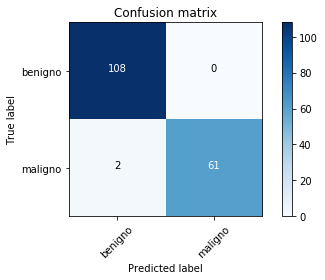

In [22]:
from sklearn.metrics import confusion_matrix
from viz import plot_confusion_matrix

y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,["benigno", "maligno"])

Osservando la matrice di confusione possiamo vedere che:
1. La rete ha correttamente classificato 108 tumori benigni su 108.
2. La rete ha correttamente classificato 61 tumori maligni su 63
3. La rete ha confuso 2 tumori maligni come tumori benigni.

Come vedi, in questo caso, due paziente potrebbero non aver ricevuto le cure per la loro condizione medica.